In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_Train)
y_Test_OneHot = np_utils.to_categorical(y_Test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters     = 16,
                 kernel_size = (5, 5),
                 padding     = 'same',
                 input_shape = (28, 28, 1),
                 activation  = 'relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(filters     = 36,
                 kernel_size = (5, 5),
                 padding     = 'same',
                 activation  = 'relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [18]:
model.compile(loss      = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy'])

In [19]:
train_history = model.fit(x = x_Train4D_normalize,
                          y = y_Train_OneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 300,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 40s - loss: 0.4907 - acc: 0.8468 - val_loss: 0.0974 - val_acc: 0.9718
Epoch 2/10
 - 42s - loss: 0.1417 - acc: 0.9586 - val_loss: 0.0637 - val_acc: 0.9805
Epoch 3/10
 - 41s - loss: 0.1034 - acc: 0.9684 - val_loss: 0.0525 - val_acc: 0.9836
Epoch 4/10
 - 41s - loss: 0.0844 - acc: 0.9751 - val_loss: 0.0454 - val_acc: 0.9858
Epoch 5/10
 - 42s - loss: 0.0723 - acc: 0.9780 - val_loss: 0.0390 - val_acc: 0.9878
Epoch 6/10
 - 43s - loss: 0.0648 - acc: 0.9809 - val_loss: 0.0394 - val_acc: 0.9880
Epoch 7/10
 - 44s - loss: 0.0566 - acc: 0.9831 - val_loss: 0.0411 - val_acc: 0.9876
Epoch 8/10
 - 45s - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0329 - val_acc: 0.9903
Epoch 9/10
 - 42s - loss: 0.0453 - acc: 0.9865 - val_loss: 0.0348 - val_acc: 0.9893
Epoch 10/10
 - 43s - loss: 0.0427 - acc: 0.9868 - val_loss: 0.0334 - val_acc: 0.9907


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

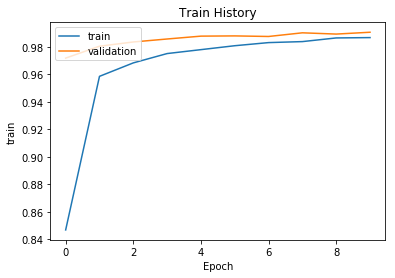

In [24]:
show_train_history(train_history, 'acc', 'val_acc')

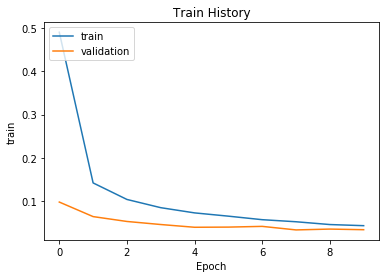

In [25]:
show_train_history(train_history, 'loss', 'val_loss')

In [26]:
scores = model.evaluate(x_Test4D_normalize, y_Test_OneHot)
scores[1]

10000/10000 [==============================] - 3s 341us/step


0.9916

In [29]:
prediction = model.predict_classes(x_Test4D_normalize)

In [30]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [31]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

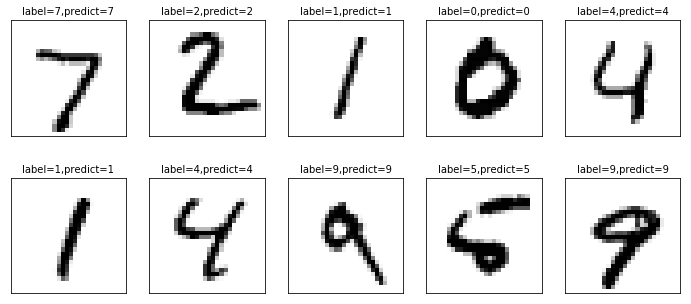

In [33]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0)

In [34]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,0,1025,0,1,0,0,2,2,0
3,0,0,0,1005,0,1,0,2,2,0
4,0,0,0,0,973,0,1,0,1,7
5,1,0,0,5,0,883,2,0,0,1
6,5,2,0,1,1,1,948,0,0,0
7,0,1,4,2,0,0,0,1018,1,2
8,4,0,2,2,0,0,0,2,961,3
